# Imports

In [31]:
import sys
import os
import json
from pathlib import Path

In [2]:
sys.path.append(os.path.join(os.getcwd(),"..","..","Document_Classifier","Data_Preparations"))

In [4]:
import numpy as np
import pandas as pd

In [22]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from clean_text_data import CleanText

In [5]:
data_store=Path(os.getcwd()).parent.parent/"Data_Store"

# Load Data

In [6]:
data=pd.read_csv(
    os.path.join(data_store,"sentiment_analysis_dataset.csv")
)

In [7]:
data

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business
...,...,...,...,...,...,...,...,...
3495,etfdailynews,MarketBeat News,"Arrow Electronics, Inc. (NYSE:ARW) Shares Purc...",QRG Capital Management Inc. increased its stak...,https://www.etfdailynews.com/2024/07/18/arrow-...,2024-07-18T14:36:45+00:00,positive,Technology
3496,etfdailynews,MarketBeat News,"3,120 Shares in NICE Ltd. (NASDAQ:NICE) Bought...",QRG Capital Management Inc. bought a new posit...,https://www.etfdailynews.com/2024/07/18/3120-s...,2024-07-18T14:36:44+00:00,positive,Technology
3497,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Has $857,000 Stock...",QRG Capital Management Inc. boosted its stake ...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18T14:36:43+00:00,positive,Technology
3498,finanznachrichten,NaN,Biotechnology Market: Surging Investments and ...,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",https://www.finanznachrichten.de/nachrichten-2...,2024-07-18T14:36:00+00:00,neutral,Technology


# Analysing Data

In [8]:
data.iloc[0].Description

'ST. GEORGE — Kaitlyn Larson, a first-year teacher at Pine View High School, recently received the Best in State award for a business leadership course. Larson’s students in grades 10-12 had the highest passing rate on the YouScience exam during the spring and fall semesters of 2023. The YouScience exam is similar to final exams [&#8230;]'

## Label Count

<Axes: xlabel='Sentiment'>

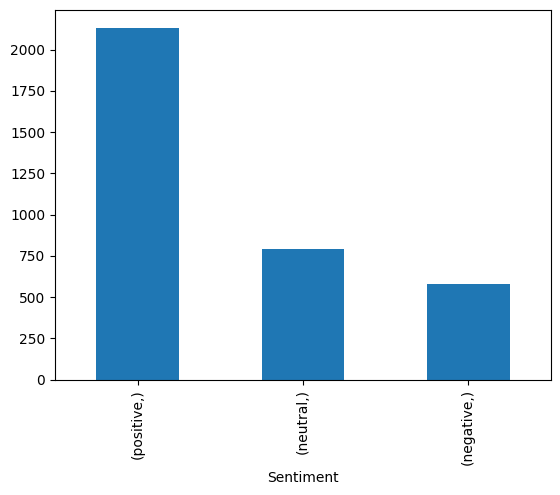

In [9]:
data[["Sentiment"]].value_counts().plot(kind="bar")

## Word Count in Text

In [10]:
data["word_count"]=data["Description"].apply(lambda x: len(x.split(" ")))

<Axes: >

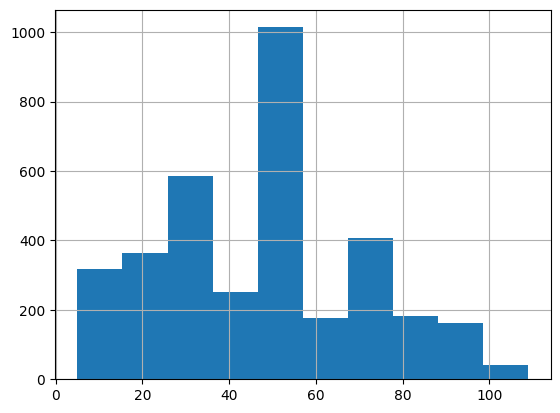

In [11]:
data["word_count"].hist()

In [19]:
print("Word Count:")
print(f"Mean: {data['word_count'].mean()}")
print(f"Median: {data['word_count'].median()}")

Word Count:
Mean: 48.176857142857145
Median: 51.0


# Preparing Data

## Cleaning Text Data

In [12]:
data["cleaned_text"]=data["Description"].apply(lambda x: CleanText(x,filter_stopwords=False))

In [13]:
data.iloc[0].cleaned_text

'george kaitlyn a teacher at pine view high recently received the best in state award for a business leadership students in grades had the highest passing rate on the youscience exam during the spring and fall semesters of the youscience exam is similar to final exams'

## Word Count (Cleaned Text)

In [15]:
data["cleaned_text_word_count"]=data["cleaned_text"].apply(lambda x: len(x.split(" ")))

<Axes: >

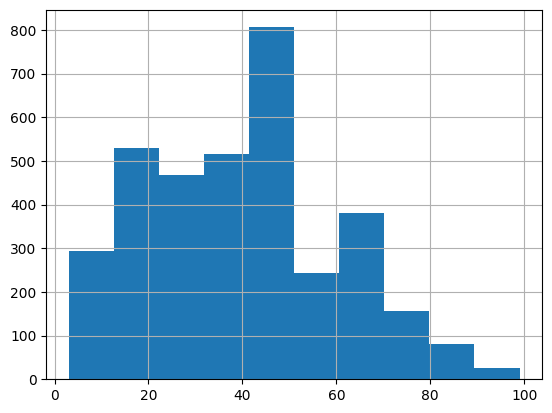

In [17]:
data["cleaned_text_word_count"].hist()

In [20]:
print("Word Count (Cleaned Text):")
print(f"Mean: {data['cleaned_text_word_count'].mean()}")
print(f"Median: {data['cleaned_text_word_count'].median()}")

Word Count (Cleaned Text):
Mean: 39.73428571428571
Median: 41.0


## Encoding Labels

In [24]:
label_encoder=LabelEncoder()

In [27]:
data["label"]=label_encoder.fit_transform(data["Sentiment"])

## Saving Label Mapping

In [29]:
sentiment_analyser_labels={}
for ind,label in enumerate(label_encoder.classes_):
    sentiment_analyser_labels[label]=ind

In [30]:
sentiment_analyser_labels

{'negative': 0, 'neutral': 1, 'positive': 2}

In [32]:
with open(os.path.join(data_store,"sentiment_analyser_label_mapping.json"),"w") as file:
    json.dump(sentiment_analyser_labels,file)
    

## Saving Cleaned Dataset

In [33]:
cleaned_dataset=data[["cleaned_text","label"]]

In [34]:
cleaned_dataset

,cleaned_text,label
0,george kaitlyn a teacher at pine view high rec...,2
1,zimbabwe local businesses are grappling with a...,1
2,billionaire elon musk has donated to a super p...,2
3,a trade regulator on fridayannounced a suite o...,0
4,million households in the have solar panels on...,2
...,...,...
3495,qrg capital management increased its stake in ...,2
3496,qrg capital management bought a new position i...,2
3497,qrg capital management boosted its stake in ak...,2
3498,july according to the global biotechnology ma...,1


In [35]:
cleaned_dataset.to_csv(
    os.path.join(data_store,"sentiment_analyser_prepared_data.csv"),
    index=False
)